In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
from pathlib import Path
sys.path.insert(0, str(Path().resolve().parents[1]))
from model import left_right_task as lrt, network_model, plot_style, util

### tr vs det data

In [2]:
data_dir = 'n_states_vs_tr_det_1'
counts = np.load(data_dir + '/counts.npy')
WEE_mesh = np.load(data_dir + '/WEE_mesh.npy')
WEI_mesh = np.load(data_dir + '/WEI_mesh.npy')
WIE_mesh = np.load(data_dir + '/WIE_mesh.npy')
WII_mesh = np.load(data_dir + '/WII_mesh.npy')

counts.shape, WEE_mesh.shape, WEI_mesh.shape, WIE_mesh.shape, WII_mesh.shape

((900,), (900,), (900,), (900,), (900,))

In [3]:
n = 30
traces = np.logspace(0, 5, n) * -1
determinants = np.logspace(5, 7, n)
trace_mesh, determinant_mesh = np.meshgrid(traces, determinants)

In [4]:
# make counts nan where Wee_mesh is nan
counts = np.where(np.isnan(WEE_mesh), np.nan, counts)

### n_states vs nPairs data

In [14]:
nPairs_counts = np.load('n_states_vs_n_pairs/counts.npy')
nPairs_counts.shape

(50, 3)

In [9]:
def plot_tr_vs_det(ax):
    c = ax.pcolormesh(determinant_mesh, trace_mesh, counts.reshape(trace_mesh.shape), shading='auto')
    ax.set_xlabel('Determinant (log scale)')
    ax.set_ylabel('Trace (log scale)')
    ax.set_xscale('symlog')
    ax.set_yscale('symlog')
    return c

In [20]:
from scipy.optimize import curve_fit

In [ ]:
def plot_n_pairs_vs_states(ax):
    ns = nPairs_counts[:,1]
    counts = nPairs_counts[:,2]
    ax.scatter(ns, counts, c='k')
        
    # exponential fit
    def exp_func(x, a, b):
        return a * np.power(b, x)
    exp_coeffs, _ = curve_fit(exp_func, ns, counts, p0=(1,2))
    
    fit_ns = np.linspace(min(ns-1), max(ns+1), 100)
    a, b = exp_coeffs
    ax.plot(fit_ns, exp_func(fit_ns, *exp_coeffs), 'r--', label=r"$y = $" + fr"${a:.2f}$" + '\u00D7' + fr"${b:.2f}^N$")
    ax.set_xlabel('# of Pairs (N)')
    ax.set_ylabel('State Count')
    ax.set_yscale('log')
    ax.legend()

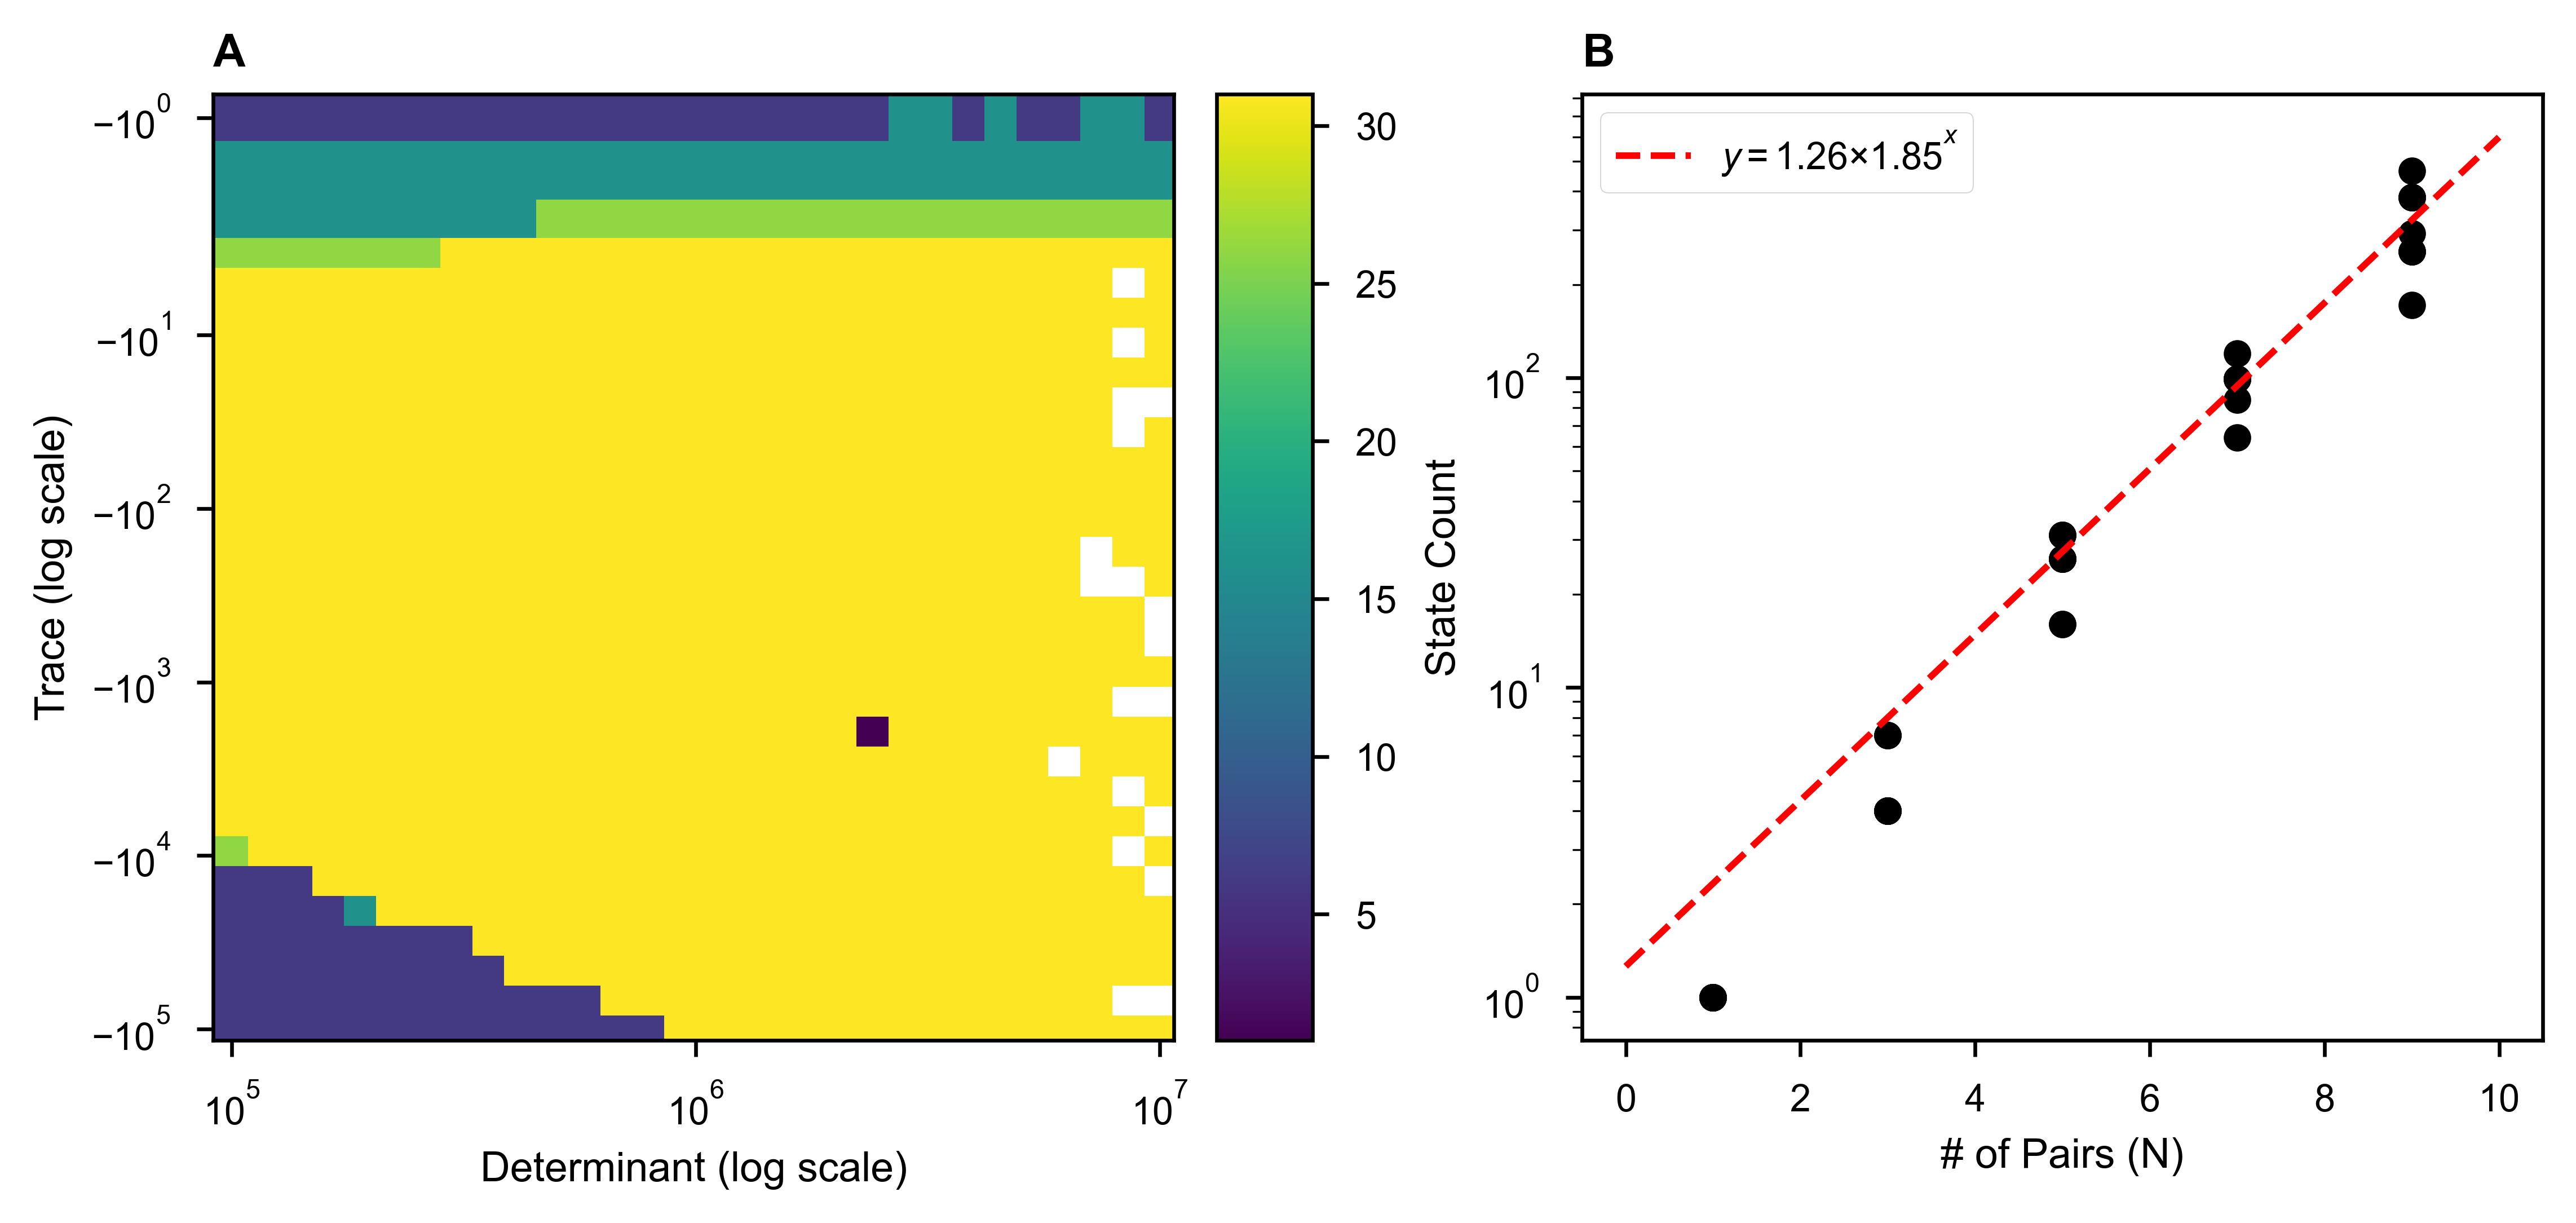

In [ ]:
MIN_WIDTH = 1578    # in pixels at 600 dpi
MAX_WIDTH = 4500
MAX_HEIGHT = 5250

px = 1/plt.rcParams['figure.dpi']   # convert pixel to inches
fig = plt.figure(layout='constrained', figsize=(MAX_WIDTH*px, MAX_HEIGHT*px*0.4))
axd = fig.subplot_mosaic(
    """
    ABx
    """,
    width_ratios=[1, 1, 0.1]
)
# add titles
axd['A'].set_title('A', loc='left', fontweight='bold')
axd['B'].set_title('B', loc='left', fontweight='bold')

c = plot_tr_vs_det(axd['B'])
cbar = fig.colorbar(c, cax=axd['x'], location='right')

plot_n_pairs_vs_states(axd['A'])